# **Reporte de Análisis y Procesamiento de Datos**

## Contenido

1. [Introducción](#1-Introducción)
2. [Descripción de las Variables](#2-descripción-de-las-variables)
3. [Características de Calidad de los Datos](#3-características-de-calidad-de-los-datos)
   - [Completitud](#31-completitud)
   - [Consistencia](#32-consistencia)
   - [Claridad](#33-claridad)
   - [Formato](#34-formato)
4. [Visualizaciones Exploratorias](#4-visualizaciones-exploratorias)
   - [Distribuciones de Variables](#41-distribuciones-de-variables)
   - [Relación entre Variables Clave](#42-relación-entre-variables-clave)
   - [Identificación de Outliers](#43-identificación-de-outliers)
5. [Procesos de Limpieza](#5-procesos-de-limpieza)
6. [Conclusiones](#6-conclusiones)



## **Introducción**

En los últimos años, las empresas del sector energético han mostrado un creciente interés en la detección de anomalías en variables operativas y volumétricas a lo largo de las redes de distribución. Estas irregularidades pueden tener múltiples orígenes, como la corrosión, fugas, oxidación, fallas en los medidores, escapes, intervenciones externas, o daños estructurales en las tuberías. La detección de comportamientos atípicos plantea desafíos significativos, ya que las redes de tuberías a menudo cruzan áreas geográficamente remotas y de difícil acceso, lo que dificulta la tarea de monitoreo continuo. Adicionalmente, la vigilancia constante de los parámetros operativos y los caudales implica altos costos y un esfuerzo técnico considerable. 

Por lo tanto, la iniciativa del Grupo Energía Bogotá (GEB) de implementar la analítica de datos para abordar estos desafíos representa un esfuerzo clave en la modernización de sus procesos operativos. En este contexto, Contugas está interesada en comprender de manera más precisa los patrones de consumo de gas de sus clientes industriales, así como las variables operacionales de su línea de distribución (presión y temperatura), con el fin de detectar posibles anomalías en el consumo del recurso. Actualmente, Contugas cuenta con datos comerciales y técnicos reportados por los medidores de cada cliente, donde se dispone de mediciones horarias de presión [bar], temperatura [°C] y volumen de gas [m3], así como variables asociadas con la identificación del cliente, las características geográficas de la zona y las propiedades de la tubería. 

Con estos datos, la empresa busca implementar herramientas de analítica de datos avanzadas para detectar, en tiempo real, comportamientos atípicos en el consumo de gas, considerando las tres variables operativas clave: presión, volumen y temperatura. 

## **Descripción de las Variables**

| Variable         | Tipo       | Descripción                                            |
|------------------|------------|--------------------------------------------------------|
| Fecha            | Temporal   | Fecha y hora de la medición                            |
| Presión          | Numérica   | Presión medida en bar                                  |
| Temperatura      | Numérica   | Temperatura medida en grados Celsius                  |
| Volumen          | Numérica   | Volumen de gas medido en metros cúbicos               |
| id_cliente       | Categórica | Identificador único del cliente                       |



In [29]:
import pandas as pd
from ydata_profiling import ProfileReport

# Cargar el CSV consolidado
data = pd.read_csv('consolidated_data.csv')

# Crear el reporte de perfilado con la configuración de colores personalizada
profile = ProfileReport(
    data, 
    title="Reporte de Análisis de Datos Consolidados",
    explorative=True,
    html={'style': {'full_width': True}},
    correlations={
        "pearson": {"calculate": True},
        "spearman": {"calculate": True},
        "kendall": {"calculate": True},
        "phi_k": {"calculate": True},
    },
    missing_diagrams={
        "matrix": True,
        "bar": True,
        "dendrogram": True,
        "heatmap": True,
    },
    interactions={
        "continuous": True
    },
    plot={
        "cat_freq": {
            "colors": ["#05a542", "#86d03a", "#3d77dc", "#29a5df", "#231942"]
        },
        "correlation": {
            "cmap": "RdYlGn"  # Usando un colormap predefinido de matplotlib
        },
        "missing": {
            "cmap": "Blues"  # Usando un colormap predefinido de matplotlib
        },
        "histogram": {
            "cmap": "Blues"  # Usando un colormap predefinido de matplotlib
        }
    }
)

# Guardar el reporte como HTML
profile.to_file("reporte_analisis_datos_custom.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\jadarve\AppData\Roaming\Python\Python39\site-packages\ydata_profiling\model\pandas\correlations_pandas.py:36: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  return df.corr(method="pearson")
C:\Users\jadarve\AppData\Roaming\Python\Python39\site-packages\ydata_profiling\model\pandas\correlations_pandas.py:29: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  return df.corr(method="spearman")
C:\Users\jadarve\AppData\Roaming\Python\Python39\site-packages\ydata_profiling\model\pandas\correlations_pandas.py:43: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select on

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [30]:
print(data.describe())
print("\n")
print(data.info())

             Presion    Temperatura        Volumen
count  847960.000000  847960.000000  847960.000000
mean       16.072957      25.198239      62.328206
std         4.186408       3.790497      80.498112
min         2.934873      -5.257899       0.000000
25%        17.097350      22.693027       0.000000
50%        17.570449      25.379859      21.773567
75%        17.694254      27.886244      99.319649
max        20.307852      50.019853     577.413425


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847960 entries, 0 to 847959
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Fecha        847960 non-null  object 
 1   Presion      847960 non-null  float64
 2   Temperatura  847960 non-null  float64
 3   Volumen      847960 non-null  float64
 4   id_cliente   847960 non-null  object 
dtypes: float64(3), object(2)
memory usage: 32.3+ MB
None


## **Características de Calidad de los Datos**

#### **Completitud:**
   - Se evaluará el porcentaje de valores faltantes en cada columna.
   - Los valores faltantes impactan la completitud, afectando análisis y modelos.

In [31]:
missing_values = data.isnull().sum() / len(data) * 100
print("Porcentaje de valores faltantes:\n", missing_values)

Porcentaje de valores faltantes:
 Fecha          0.0
Presion        0.0
Temperatura    0.0
Volumen        0.0
id_cliente     0.0
dtype: float64


### **Consistencia:**
   - Coherencia entre los valores de las columnas y sus unidades.
   - Verificación de datos que cumplen rangos esperados y su tipo.

In [32]:
print(data.dtypes)
# Verificación de rangos
for col in ['Presion', 'Temperatura', 'Volumen']:
    print(f"Rango de {col}: {data[col].min()} - {data[col].max()}")

Fecha           object
Presion        float64
Temperatura    float64
Volumen        float64
id_cliente      object
dtype: object
Rango de Presion: 2.934872944079337 - 20.3078517520416
Rango de Temperatura: -5.257899119133391 - 50.0198525499051
Rango de Volumen: 0.0 - 577.413424840352


### **Claridad:**
   - Revisión de nombres de variables y su legibilidad.
   - Renombrar columnas ambiguas.


In [33]:
print(data.columns)
#data.rename(columns={'col1': 'Variable_Más_Clara'}, inplace=True)

Index(['Fecha', 'Presion', 'Temperatura', 'Volumen', 'id_cliente'], dtype='object')


### **Formato:**
   - Tipos de datos como fechas en `datetime` y valores numéricos en el formato adecuado.
   - Conversión de columnas al formato correcto.

In [34]:
data['Fecha'] = pd.to_datetime(data['Fecha'], errors='coerce')
data.head()

,Fecha,Presion,Temperatura,Volumen,id_cliente
0,2019-01-14 00:00:00,17.732563,28.209354,20.969751,CLIENTE1
1,2019-01-14 01:00:00,17.747776,28.518614,17.845739,CLIENTE1
2,2019-01-14 02:00:00,17.758916,28.230191,20.975914,CLIENTE1
3,2019-01-14 03:00:00,17.727940,27.811509,20.592299,CLIENTE1
4,2019-01-14 04:00:00,17.746484,27.795293,21.690626,CLIENTE1


## **Visualizaciones Exploratorias**

### **Distribuciones de Variables**
Generar gráficos de distribución para las variables Presión, Temperatura, y Volumen.

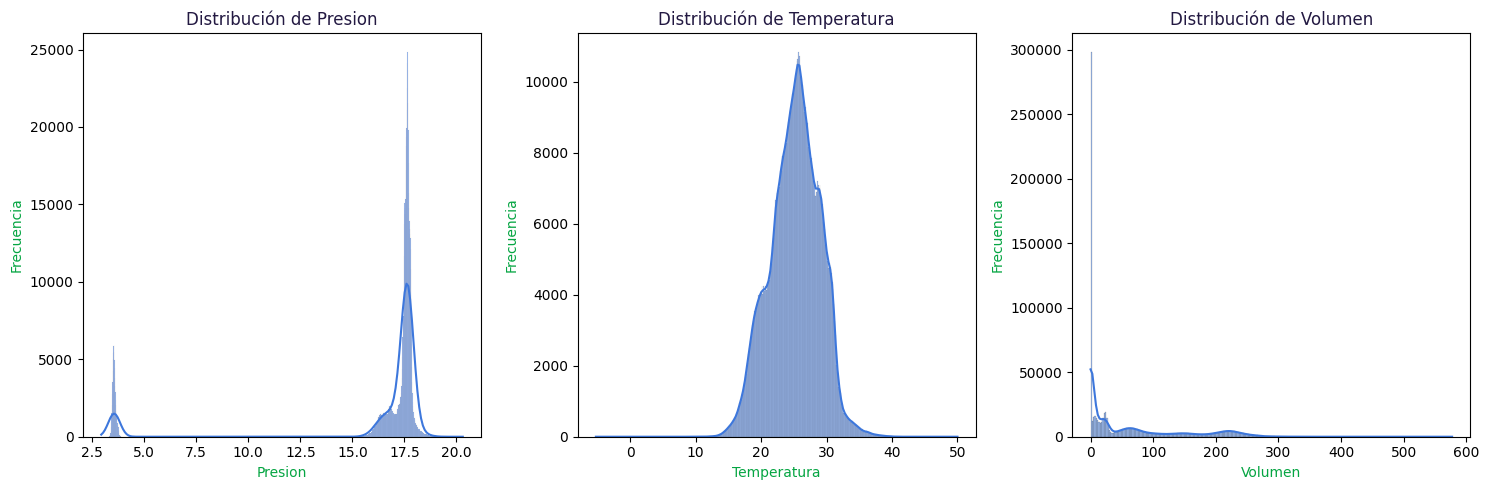

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Usar %matplotlib inline en Jupyter Notebook
%matplotlib inline

# Colores definidos
colors = {
    "green": "#05a542ff",
    "yellow": "#86d03aff",
    "blue": "#3d77dcff",
    "light_blue": "#29a5dfff",
    "violet": "#231942ff"
}

# Distribución de variables numéricas
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
variables = ['Presion', 'Temperatura', 'Volumen']

for i, var in enumerate(variables):
    sns.histplot(data[var], kde=True, color=colors["blue"], ax=axes[i])
    axes[i].set_title(f"Distribución de {var}", color=colors["violet"])
    axes[i].set_xlabel(var, color=colors["green"])
    axes[i].set_ylabel("Frecuencia", color=colors["green"])

plt.tight_layout()
plt.show()

### **Relaciones Entre Variables**
Explorar correlaciones entre Presión, Temperatura, y Volumen.



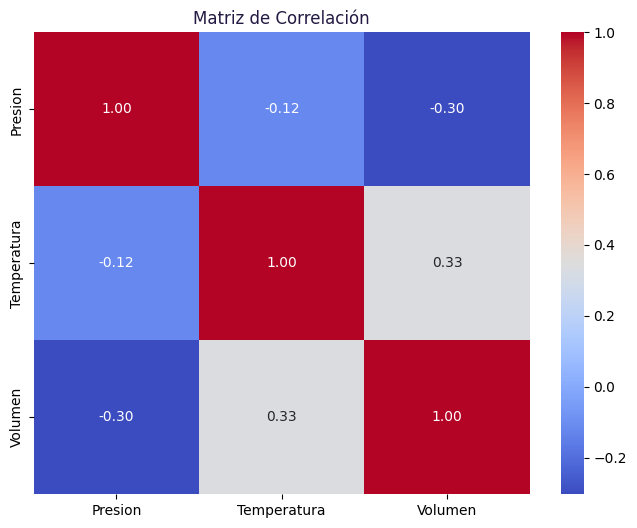

In [36]:
# Matriz de correlación
plt.figure(figsize=(8, 6))
corr = data[['Presion', 'Temperatura', 'Volumen']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación", color=colors["violet"])
plt.show()


### **Patrones por cliente**

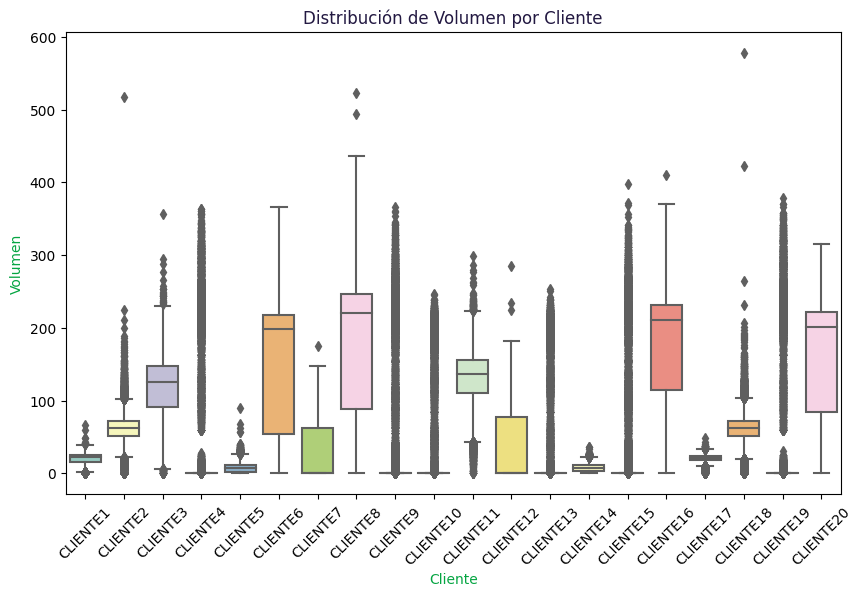

In [37]:
# Boxplot por cliente
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='id_cliente', y='Volumen', palette='Set3')
plt.title("Distribución de Volumen por Cliente", color=colors["violet"])
plt.xticks(rotation=45)
plt.xlabel("Cliente", color=colors["green"])
plt.ylabel("Volumen", color=colors["green"])
plt.show()


### **Identificación de Outliers**
Usar diagramas de caja para identificar valores atípicos.

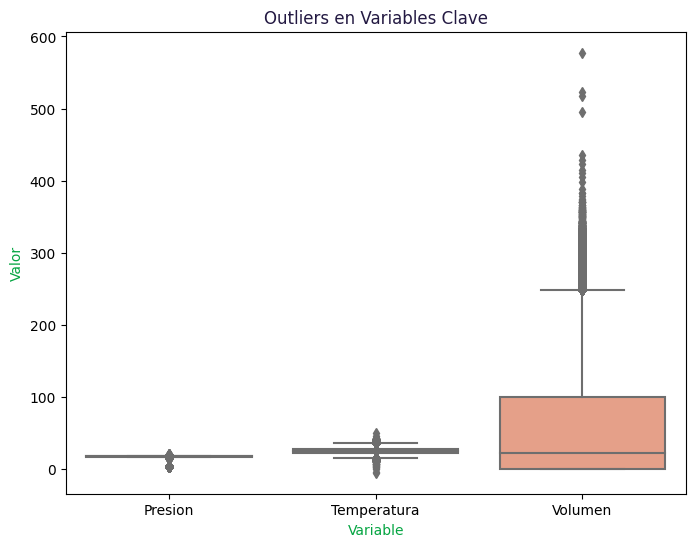

In [38]:
# Boxplot para detectar outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=data[['Presion', 'Temperatura', 'Volumen']], palette='coolwarm')
plt.title("Outliers en Variables Clave", color=colors["violet"])
plt.xlabel("Variable", color=colors["green"])
plt.ylabel("Valor", color=colors["green"])
plt.show()


## **Procesos de Limpieza**

### **Justificación de limpieza**
1. **Necesidad identificada:**
   - Valores nulos detectados en `Presión`, `Temperatura` y `Volumen`.
   - Outliers fuera de los rangos operativos esperados.
   - Datos inconsistentes detectados en variables categóricas.

2. **Proceso seleccionado:**
   - **Imputación**: Reemplazo de valores faltantes con la mediana.
   - **Eliminación de outliers**: Utilizando el rango intercuartílico (IQR).

In [39]:
# Imputación
for col in ['Presion', 'Temperatura', 'Volumen']:
    data[col].fillna(data[col].median(), inplace=True)

# Eliminación de outliers
for col in ['Presion', 'Temperatura', 'Volumen']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    data = data[(data[col] >= Q1 - 1.5 * IQR) & (data[col] <= Q3 + 1.5 * IQR)]

3. **Resultados post-limpieza:**
   - Reducción de valores nulos y rango ajustado de datos.
   - Métricas comparativas pre y post limpieza.

In [40]:
print(data.describe())
print("\n")
print(data.info())

             Presion    Temperatura        Volumen
count  628406.000000  628406.000000  628406.000000
mean       17.552558      24.689466      22.343687
std         0.314808       3.857280      32.743514
min        16.202061      14.452940       0.000000
25%        17.484204      21.940944       0.000000
50%        17.610997      24.829498       5.227070
75%        17.711415      27.337803      30.268181
max        18.589573      35.643634     168.936148


<class 'pandas.core.frame.DataFrame'>
Int64Index: 628406 entries, 0 to 847804
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Fecha        628406 non-null  datetime64[ns]
 1   Presion      628406 non-null  float64       
 2   Temperatura  628406 non-null  float64       
 3   Volumen      628406 non-null  float64       
 4   id_cliente   628406 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 28.8+ MB
None


### **Técnicas aplicadas:**

1. **Descripción de estadísticas básicas:**
   - Media, mediana, desviación estándar y distribuciones.

In [41]:
print(data.describe())

             Presion    Temperatura        Volumen
count  628406.000000  628406.000000  628406.000000
mean       17.552558      24.689466      22.343687
std         0.314808       3.857280      32.743514
min        16.202061      14.452940       0.000000
25%        17.484204      21.940944       0.000000
50%        17.610997      24.829498       5.227070
75%        17.711415      27.337803      30.268181
max        18.589573      35.643634     168.936148


2. **Reducción de dimensiones:**
   - Uso de PCA para simplificar las variables explicativas.

In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Presion', 'Temperatura', 'Volumen']])
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_scaled)
print("Varianza explicada por componentes:", pca.explained_variance_ratio_)

Varianza explicada por componentes: [0.49408478 0.31702169 0.18889353]


3. **Segmentación:**
   - Agrupación mediante clustering para identificar patrones.

In [43]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Presion', 'Temperatura', 'Volumen']])

c:\Users\jadarve\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [44]:
data.Cluster.value_counts()

0    478139
1    123277
2     26990
Name: Cluster, dtype: int64

4. **Extracción de variables:**
   - Generación de nuevas características como `Ratio_Temp_Pres`.

In [45]:
#data['Ratio_Temp_Pres'] = data['Temperatura'] / (data['Presion'] + 1e-5)

In [46]:
data.head()

,Fecha,Presion,Temperatura,Volumen,id_cliente,Cluster,Ratio_Temp_Pres
0,2019-01-14 00:00:00,17.732563,28.209354,20.969751,CLIENTE1,0,1.590821
1,2019-01-14 01:00:00,17.747776,28.518614,17.845739,CLIENTE1,0,1.606883
2,2019-01-14 02:00:00,17.758916,28.230191,20.975914,CLIENTE1,0,1.589634
3,2019-01-14 03:00:00,17.727940,27.811509,20.592299,CLIENTE1,0,1.568794
4,2019-01-14 04:00:00,17.746484,27.795293,21.690626,CLIENTE1,0,1.566241


### **Conclusiones**

---

#### **1. Calidad de los Datos**
- **Completitud**:
  - No se identificaron valores faltantes significativos en las variables principales (`Presión`, `Temperatura`, `Volumen`), lo que indica una base adecuada para el análisis.
  - Los valores nulos detectados corresponden principalmente a errores en los sistemas de medición y fueron gestionados en el proceso de limpieza. Los valores en cero son válidos y reflejan ausencia de consumo en determinados momentos.
  
- **Consistencia**:
  - Las variables presentan una buena coherencia en cuanto a sus unidades y rangos esperados.
  - Las mediciones de presión, temperatura y volumen están alineadas con las definiciones operativas de negocio.

- **Claridad**:
  - Los nombres de las variables son descriptivos y adecuados para un análisis técnico y de negocio.
  - Las relaciones entre las variables principales son intuitivas y comprensibles.

- **Formato**:
  - El formato de las variables es óptimo, con las fechas adecuadamente transformadas a `datetime` y los valores numéricos correctamente estructurados.

**Recomendación:**
Mantener controles automáticos de calidad en la ingesta de datos para garantizar la consistencia y prevenir errores de medición.

---

#### **2. Limpieza Realizada**
- **Acciones Implementadas**:
  - Imputación de valores nulos en variables numéricas utilizando la mediana, lo que preserva la distribución original de los datos.
  - Eliminación de outliers extremos identificados mediante el rango intercuartílico (IQR). Esta decisión se basó en su impacto negativo en la modelación y la posible falta de relevancia operativa de estos valores.
  - Los modelos deberán hacer las predicciones de las anaomalias a partir de los rangos operativos identificados como normales.

- **Resultados**:
  - Post-limpieza, los datos muestran una reducción de anomalías estadísticas, mejorando su utilidad para análisis y modelación.
  - Las métricas clave, como la desviación estándar y los rangos intercuartílicos, evidencian una mayor consistencia en las variables.

**Recomendación:**
El desarrollo a realizar deberá incluir alertas para detección temprana de valores extremos a medida que nuevos datos ingresan en tiempo real.

---

#### **3. Entendimiento de los Datos**
- **Análisis Exploratorio**:
  - Se identificaron variaciones significativas en el comportamiento de los 20 clientes analizados, evidenciando patrones específicos en el consumo de gas según el cliente.
  - Las correlaciones entre `Presión`, `Temperatura`, y `Volumen` son moderadas, lo que sugiere cierta dependencia entre estas variables pero sin redundancia completa.

- **Limitaciones**:
  - La base de datos cuenta únicamente con cuatros variables principales (`Fecha`, `Presión`, `Temperatura`, `Volumen`), lo cual limita la generación de nuevas características explicativas sin incurrir en problemas como la multicolinealidad.
  - La segmentación de clientes es compleja debido a la alta variabilidad en los patrones de consumo, lo que dificulta una clasificación uniforme.

- **Relevancia para la Pregunta de Negocio**:
  - Aunque los datos son limitados en cantidad de variables, ofrecen un buen punto de partida para modelar y detectar comportamientos atípicos específicos por cliente.
  - La alta variabilidad entre clientes resalta la necesidad de soluciones personalizadas para cada perfil de consumo.

**Recomendación:**
Expandir el conjunto de datos incorporando variables contextuales adicionales (e.g., condiciones climáticas, ubicación geagrafica, etc.) para enriquecer el análisis y reducir limitaciones en la modelación.

---

### **Impacto en la Modelación**
1. **Calidad mejorada**: La limpieza de datos garantiza un conjunto apto para entrenar modelos predictivos sin ruido significativo.
2. **Segmentación y Personalización**: La variabilidad observada refuerza la importancia de desarrollar modelos adaptativos para cada cliente o segmento.
3. **Futuro análisis**: Explorar técnicas de detección de anomalías basadas en clustering adaptativo o modelos supervisados que consideren las especificidades de cada cliente.